In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pandas import DataFrame
import scipy.stats as stats

In [29]:
TCSR_an_path = "NC_Files/Tot Constr Spend Resi Annual Raw.csv"

NHSP_an_path = "NC_Files/Median Sales Price for New Houses Sold Annual Raw.csv"

HSP_an_path = "NC_Files/Median Sales Price of Houses Sold Annual Raw.csv"

Pop_an_path = "NC_Files/Population Annual Raw.csv"

In [30]:
data1 = pd.read_csv(TCSR_an_path)
Ta_data_df = pd.DataFrame(data1)
data2 = pd.read_csv(NHSP_an_path)
NHa_data_df = pd.DataFrame(data2)
data3 = pd.read_csv(HSP_an_path)
Ha_data_df = pd.DataFrame(data3)
data4 = pd.read_csv(Pop_an_path)
Pa_data_df = pd.DataFrame(data4)
NHa_data_df['DATE'] = NHa_data_df['DATE'].astype('datetime64[D]')
Ta_data_df['DATE'] = Ta_data_df['DATE'].astype('datetime64[D]')
Ha_data_df['DATE'] = Ha_data_df['DATE'].astype('datetime64[D]')
Pa_data_df['DATE'] = Pa_data_df['DATE'].astype('datetime64[D]')

In [40]:
merge1 = pd.merge(Ta_data_df, NHa_data_df, how="left", on=["DATE"])
merge1_df = pd.DataFrame(merge1)
merge2 = pd.merge(Ha_data_df, Pa_data_df, how="left", on=["DATE"])
merge2_df = pd.DataFrame(merge2)
TCSR_NHSP_HSP_Pop = pd.merge(merge1_df, merge2_df, how="left", on=["DATE"])
TCSR_NHSP_HSP_Pa_df = pd.DataFrame(TCSR_NHSP_HSP_Pop)
#TCSR_NHSP_HSP_Pa_df.dropna(inplace=True)
TCSR_NHSP_HSP_Pa_df.drop(TCSR_NHSP_HSP_Pa_df.tail(1).index,inplace=True)
TCSR_NHSP_HSP_Pa_df.tail()

,DATE,TLRESCONS,MSPNHSUS,MSPUS,POPTHM
16,2018-01-01,564342.500000000000,323125.000000000000,325275.000000000000,328794.500000000000
17,2019-01-01,552999.250000000000,319266.666666666667,320250.000000000000,330512.583333333333
18,2020-01-01,644425.000000000000,334991.666666666667,336950.000000000000,331787.416666666667
19,2021-01-01,808891.166666666667,393966.666666666667,396800.000000000000,332351.166666666667
20,2022-01-01,927137.583333333333,455850.000000000000,457475.000000000000,333595.083333333333


In [41]:
TCSR_NHSP_HSP_Pa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       21 non-null     datetime64[ns]
 1   TLRESCONS  21 non-null     object        
 2   MSPNHSUS   21 non-null     object        
 3   MSPUS      21 non-null     object        
 4   POPTHM     21 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1008.0+ bytes


In [43]:
#TCSR_NHSP_HSP_Pa_df["TLRESCONS"] = TCSR_NHSP_HSP_Pa_df["TLRESCONS"].map(lambda x: float(x.replace(",","." "")))
TCSR_NHSP_HSP_Pa_df["TLRESCONS"] = TCSR_NHSP_HSP_Pa_df["TLRESCONS"].astype(float)

TCSR_NHSP_HSP_Pa_df["MSPNHSUS"] = TCSR_NHSP_HSP_Pa_df["MSPNHSUS"].astype(float)
TCSR_NHSP_HSP_Pa_df["MSPUS"] = TCSR_NHSP_HSP_Pa_df["MSPUS"].astype(float)
TCSR_NHSP_HSP_Pa_df["POPTHM"] = TCSR_NHSP_HSP_Pa_df["POPTHM"].astype(float)

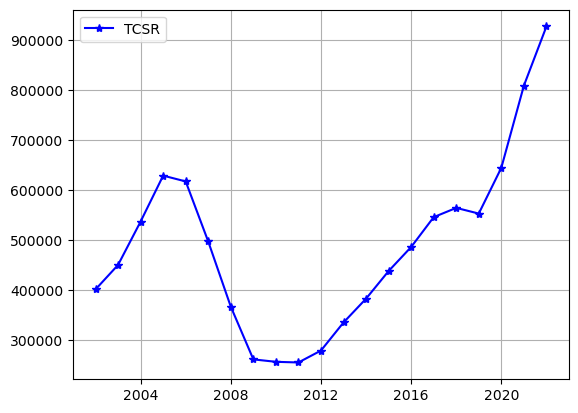

In [46]:
date = TCSR_NHSP_HSP_Pa_df["DATE"]
T = TCSR_NHSP_HSP_Pa_df["TLRESCONS"]

plt.plot(date, T, marker="*",color="blue", label="TCSR")
#plt.plot(date, HSP, marker="+",color="orange", label="HSP")
plt.legend(loc="best")
plt.grid()
plt.show()

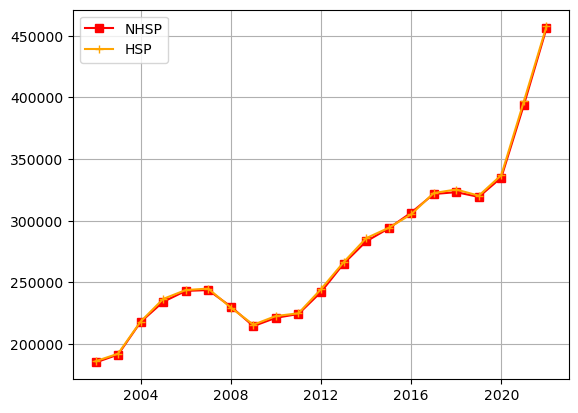

In [48]:
date = TCSR_NHSP_HSP_Pa_df["DATE"]
TCSR = TCSR_NHSP_HSP_Pa_df["TLRESCONS"]
NHSP = TCSR_NHSP_HSP_Pa_df["MSPNHSUS"]
HSP = TCSR_NHSP_HSP_Pa_df["MSPUS"]
P = TCSR_NHSP_HSP_Pa_df["POPTHM"]

#plt.plot(date, TCSR, marker="*",color="blue", label="TCSR")
plt.plot(date, NHSP, marker="s", color="Red", label="NHSP")
plt.plot(date, HSP, marker="+",color="orange", label="HSP")
#plt.plot(date, P, marker="o", color="yellow", label="Population")
plt.legend(loc="best")
plt.grid()
plt.show()